In [12]:
import pandas as pd
import plotly.express as px

Reading in the columns I need for this chart

In [13]:
df = pd.read_csv("assets/railroad_data.csv", usecols = ['Accident Type','State Abbreviation'])
df

,Accident Type,State Abbreviation
0,Derailment,IL
1,Derailment,IL
2,Side collision,NY
3,Derailment,LA
4,Hwy-rail crossing,IL
...,...,...
215844,Raking collision,IL
215845,Derailment,IL
215846,Derailment,IL
215847,Derailment,IL


Dropping all NaN values

In [14]:
df.dropna(inplace=True)

Dropping any rows with values other than 'Derailment' in the 'Accident Type' column

In [15]:
df = df[df["Accident Type"].str.contains('Derailment')]

I no longer need the accident type column

In [16]:
pd.set_option('mode.chained_assignment', None)
df.drop(['Accident Type'], axis=1, inplace= True)

Renaming the state column

In [17]:
df = df.rename(columns={'State Abbreviation': 'State'})
df

,State
0,IL
1,IL
3,LA
5,IL
8,IL
...,...
215843,IL
215845,IL
215846,IL
215847,IL


Getting the total derailments per state

In [18]:
df_counts = df.value_counts('State')

Using the value_counts output to create a new dataframe

In [19]:
df2 = df_counts.to_frame().reset_index()
df.columns

Index(['State'], dtype='object')

In [20]:
df2.rename(columns={0: 'Total Derailments'}, inplace=True)
df2.columns

Index(['State', 'Total Derailments'], dtype='object')

Plotting the new dataframe into a choropleth map

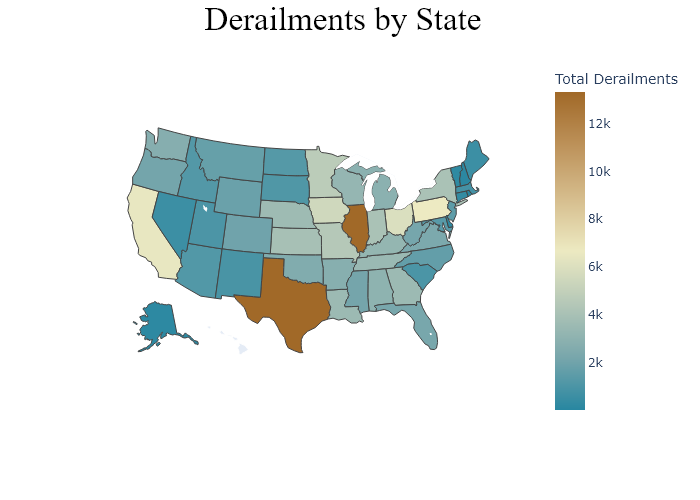

In [21]:
fig = px.choropleth(df2,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total Derailments',
                    color_continuous_scale="earth_r", 
                    
                    )
fig.update_layout(
      title_text = 'Derailments by State',
      title_font_family="Times New Roman",
      title_font_size = 33,
      title_font_color="black", 
      title_x=0.49, 
         )
fig.show('png') # I added the 'png' to show a static img for github, if you remove the 'png' the fig becomes a interactive map.